# **PPE Using YOLOv8**

### Imports

In [1]:
extractdir = '/content/PPEdataset'
!mkdir -p {extractdir}
!unzip "/content/drive/MyDrive/PPEDataset.zip" -d extractdir

Streaming output truncated to the last 5000 lines.
  inflating: extractdir/css-data/train/images/IMG_3100_mp4-25_jpg.rf.0a21e9e91348b61c6c1483d6884d2135.jpg  
  inflating: extractdir/css-data/train/images/IMG_3100_mp4-25_jpg.rf.3313bb2b19a7aa3a0af745abe858ec8e.jpg  
  inflating: extractdir/css-data/train/images/IMG_3100_mp4-25_jpg.rf.3bbcfef23f20b2cf747256793dcfc615.jpg  
  inflating: extractdir/css-data/train/images/IMG_3100_mp4-25_jpg.rf.6cee1b67a21808fad2318593379f9986.jpg  
  inflating: extractdir/css-data/train/images/IMG_3100_mp4-25_jpg.rf.ddd7840e3d846cddfcc13d99f4a6999b.jpg  
  inflating: extractdir/css-data/train/images/IMG_3100_mp4-2_jpg.rf.4d46f38425296af74814d1f0506575b4.jpg  
  inflating: extractdir/css-data/train/images/IMG_3100_mp4-2_jpg.rf.58de1db8826e4221df63fd980b823844.jpg  
  inflating: extractdir/css-data/train/images/IMG_3100_mp4-2_jpg.rf.87e69eb0f5f24cbadcca3fbfe8ca029c.jpg  
  inflating: extractdir/css-data/train/images/IMG_3100_mp4-2_jpg.rf.bde377ae23066dfe925f

In [2]:
%%capture
pip install ultralytics

In [3]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from IPython.core.magic import register_line_cell_magic
import yaml
from PIL import Image
import os
import seaborn as sns
from ultralytics import YOLO
from matplotlib.patches import Rectangle
import cv2


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### Dataset Loading

In [4]:
inputdir = '/content/extractdir/css-data'

### Preprocessing Dataset

In [5]:
num_classes = 10
classes = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

dict_file = {'train': os.path.join(inputdir, 'train'),
             'val': os.path.join(inputdir, 'valid'),
             'test': os.path.join(inputdir, 'test'),
             'nc': num_classes,
             'names': classes
            }

with open(os.path.join('/content/', 'data.yaml'), 'w+') as file:
    yaml.dump(dict_file, file)

In [6]:
class_idx = {str(i):classes[i] for i in range(num_classes)}

class_stat = {}
data_len = {}

for mode in ['train', 'valid', 'test']:

    class_count = {classes[i]:0 for i in range(num_classes)}

    path = os.path.join(inputdir, mode, 'labels')

    for file in os.listdir(path):

        with open(os.path.join(path, file)) as f:
            lines = f.readlines()

            for cls in set([line[0] for line in lines]):
                class_count[class_idx[cls]] += 1

    data_len[mode] = len(os.listdir(path))
    class_stat[mode] = class_count

### Dataset Visualization

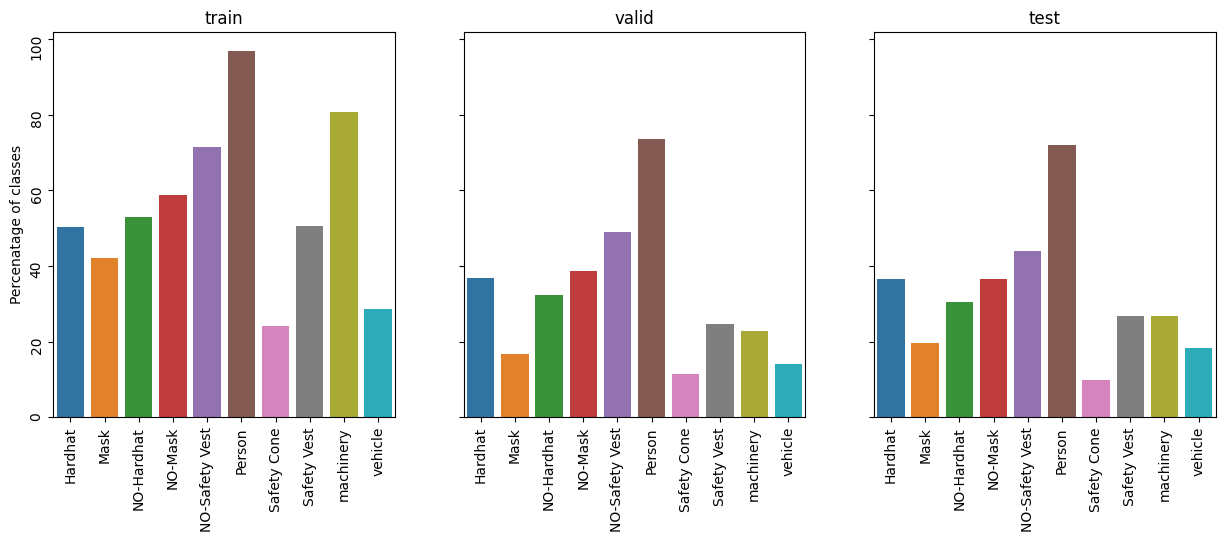

In [7]:
fig, ax = plt.subplots(1,3, figsize=(15, 5), sharey=True)

for i, mode in enumerate(['train', 'valid', 'test']):
    sns.barplot(pd.DataFrame({mode:class_stat[mode]}).T/data_len[mode]*100, ax=ax[i])
    ax[i].set_title(mode)
    ax[i].tick_params(rotation=90)
    ax[i].set_ylabel('Percenatage of classes')
plt.show()

### Model Loading

In [12]:
model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 208MB/s]


### Model Training & Fine-Tuning

In [14]:
model.train(
    data='/content/data.yaml',
    task = 'detect',
    imgsz = 640,
    epochs = 30,
    batch = 16,
    optimizer = 'auto',
    lr0 = 1e-3,
    lrf = 0.01,
    weight_decay = 5e-4,
    dropout = 0.0,
    fraction = 1.0,
    patience = 20,
    profile = False,
    label_smoothing = 0.0,
    seed = 110,
    val = True,
    amp = True,
    exist_ok = True,
    resume = False,
    device = 0,
    verbose = False,
    name = 'PPE-YOLO',
)

WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data.yaml, epochs=30, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=PPE-YOLO, exist_ok=True, pretrained=True, optimizer=auto, verbose=False, seed=110, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

train: Scanning /content/extractdir/css-data/train/labels.cache... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/extractdir/css-data/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/extractdir/css-data/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/extractdir/css-data/valid/labels.cache... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<?, ?it/s]


Plotting labels to runs/detect/PPE-YOLO/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/PPE-YOLO
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      7.26G      1.323      2.136      1.465        218        640: 100%|██████████| 163/163 [00:59<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        114        697      0.603      0.445      0.484      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      7.26G      1.212      1.466      1.361        186        640: 100%|██████████| 163/163 [01:01<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        114        697      0.612      0.471      0.514      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      7.26G      1.206      1.397      1.358        245        640: 100%|██████████| 163/163 [00:54<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        114        697      0.626      0.526      0.566      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      7.26G      1.185      1.343      1.342        259        640: 100%|██████████| 163/163 [00:56<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]

                   all        114        697      0.742      0.529      0.617      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.27G      1.163      1.274      1.319        333        640: 100%|██████████| 163/163 [00:53<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        114        697      0.719        0.6      0.618      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      7.27G      1.133      1.206        1.3        252        640: 100%|██████████| 163/163 [00:56<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]


                   all        114        697       0.74      0.593      0.652      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      7.27G      1.095      1.125      1.274        300        640: 100%|██████████| 163/163 [00:55<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all        114        697      0.773      0.601      0.665       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      7.28G      1.078      1.089       1.26        265        640: 100%|██████████| 163/163 [00:53<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        114        697      0.791      0.636      0.684      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.31G      1.051      1.045      1.243        212        640: 100%|██████████| 163/163 [00:55<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        114        697      0.814      0.627      0.699      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.31G      1.039      1.007      1.236        235        640: 100%|██████████| 163/163 [00:53<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all        114        697      0.843      0.627      0.718      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      7.31G      1.018     0.9656      1.213        313        640: 100%|██████████| 163/163 [00:53<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        114        697      0.826       0.65      0.726       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      7.35G     0.9952     0.9264        1.2        317        640: 100%|██████████| 163/163 [00:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all        114        697      0.846      0.643       0.74      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      7.38G       0.98     0.9135      1.192        227        640: 100%|██████████| 163/163 [00:53<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        114        697      0.819      0.694      0.755      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.38G     0.9711     0.8797       1.18        250        640: 100%|██████████| 163/163 [00:53<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]

                   all        114        697      0.867      0.646      0.749      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.38G     0.9483     0.8551      1.174        297        640: 100%|██████████| 163/163 [00:53<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        114        697      0.848      0.695      0.769      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.38G     0.9331     0.8349      1.163        305        640: 100%|██████████| 163/163 [00:52<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]

                   all        114        697      0.883       0.71      0.781      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.42G     0.9254     0.8167      1.156        228        640: 100%|██████████| 163/163 [00:52<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        114        697      0.871      0.688      0.772      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.42G     0.9056     0.7848      1.146        267        640: 100%|██████████| 163/163 [00:53<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        114        697      0.871      0.699      0.788      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.42G     0.8959     0.7644      1.131        267        640: 100%|██████████| 163/163 [00:52<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        114        697       0.88      0.706      0.785      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.46G     0.8776     0.7477      1.123        300        640: 100%|██████████| 163/163 [00:52<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        114        697      0.853      0.718      0.785      0.473


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.49G     0.8989      0.676      1.134        250        640: 100%|██████████| 163/163 [00:51<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]

                   all        114        697      0.839      0.719      0.784       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.49G     0.8711     0.6389      1.114        216        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        114        697      0.891      0.708      0.801      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.49G     0.8548     0.6145      1.105        176        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        114        697       0.94      0.703       0.81      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.49G     0.8391     0.5995      1.097        141        640: 100%|██████████| 163/163 [00:50<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]

                   all        114        697      0.914      0.695      0.804      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.49G     0.8192     0.5778      1.082        138        640: 100%|██████████| 163/163 [00:51<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        114        697      0.901      0.729      0.824      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.49G     0.8001     0.5558      1.066        141        640: 100%|██████████| 163/163 [00:51<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        114        697      0.858      0.764      0.824      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.49G     0.7776     0.5412      1.058        208        640: 100%|██████████| 163/163 [00:50<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]

                   all        114        697       0.88      0.738      0.822      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      7.49G     0.7689     0.5321      1.055        191        640: 100%|██████████| 163/163 [00:51<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.58it/s]

                   all        114        697      0.848      0.767      0.825      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.49G     0.7536     0.5186      1.045        154        640: 100%|██████████| 163/163 [00:52<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        114        697      0.866      0.773      0.836      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      7.49G     0.7449     0.5097      1.036        194        640: 100%|██████████| 163/163 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]


                   all        114        697       0.87      0.778      0.836      0.522

30 epochs completed in 0.462 hours.
Optimizer stripped from runs/detect/PPE-YOLO/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/PPE-YOLO/weights/best.pt, 22.5MB

Validating runs/detect/PPE-YOLO/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


                   all        114        697      0.872      0.781      0.837      0.522
Speed: 0.4ms preprocess, 9.3ms inference, 0.0ms loss, 5.6ms postprocess per image
Results saved to runs/detect/PPE-YOLO


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x790077dfb550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

### Testing the Model

In [15]:
model = YOLO('/content/runs/detect/PPE-YOLO/weights/best.pt')

In [16]:
results = model.predict(source='/content/extractdir/css-data/test/images', save=True)


image 1/82 /content/extractdir/css-data/test/images/-4405-_png_jpg.rf.82b5c10b2acd1cfaa24259ada8e599fe.jpg: 640x640 1 Hardhat, 1 NO-Safety Vest, 1 Person, 16.3ms
image 2/82 /content/extractdir/css-data/test/images/000005_jpg.rf.96e9379ccae638140c4a90fc4b700a2b.jpg: 640x640 2 Hardhats, 3 NO-Masks, 3 Persons, 16.3ms
image 3/82 /content/extractdir/css-data/test/images/002551_jpg.rf.ce4b9f934161faa72c80dc6898d37b2d.jpg: 640x640 2 Hardhats, 2 NO-Safety Vests, 3 Persons, 16.2ms
image 4/82 /content/extractdir/css-data/test/images/003357_jpg.rf.9867f91e88089bb68dc95947d5116d14.jpg: 640x640 1 Hardhat, 2 NO-Masks, 1 NO-Safety Vest, 1 Person, 1 Safety Cone, 16.3ms
image 5/82 /content/extractdir/css-data/test/images/004063_jpg.rf.1b7cdc4035bcb24ef69b8798b444053e.jpg: 640x640 5 Hardhats, 1 NO-Hardhat, 6 NO-Safety Vests, 6 Persons, 1 Safety Vest, 16.0ms
image 6/82 /content/extractdir/css-data/test/images/004763_jpg.rf.46484e6ca73caeaa9de45822cf1085a9.jpg: 640x640 3 Hardhats, 4 NO-Masks, 3 NO-Safety

### Model Visualization

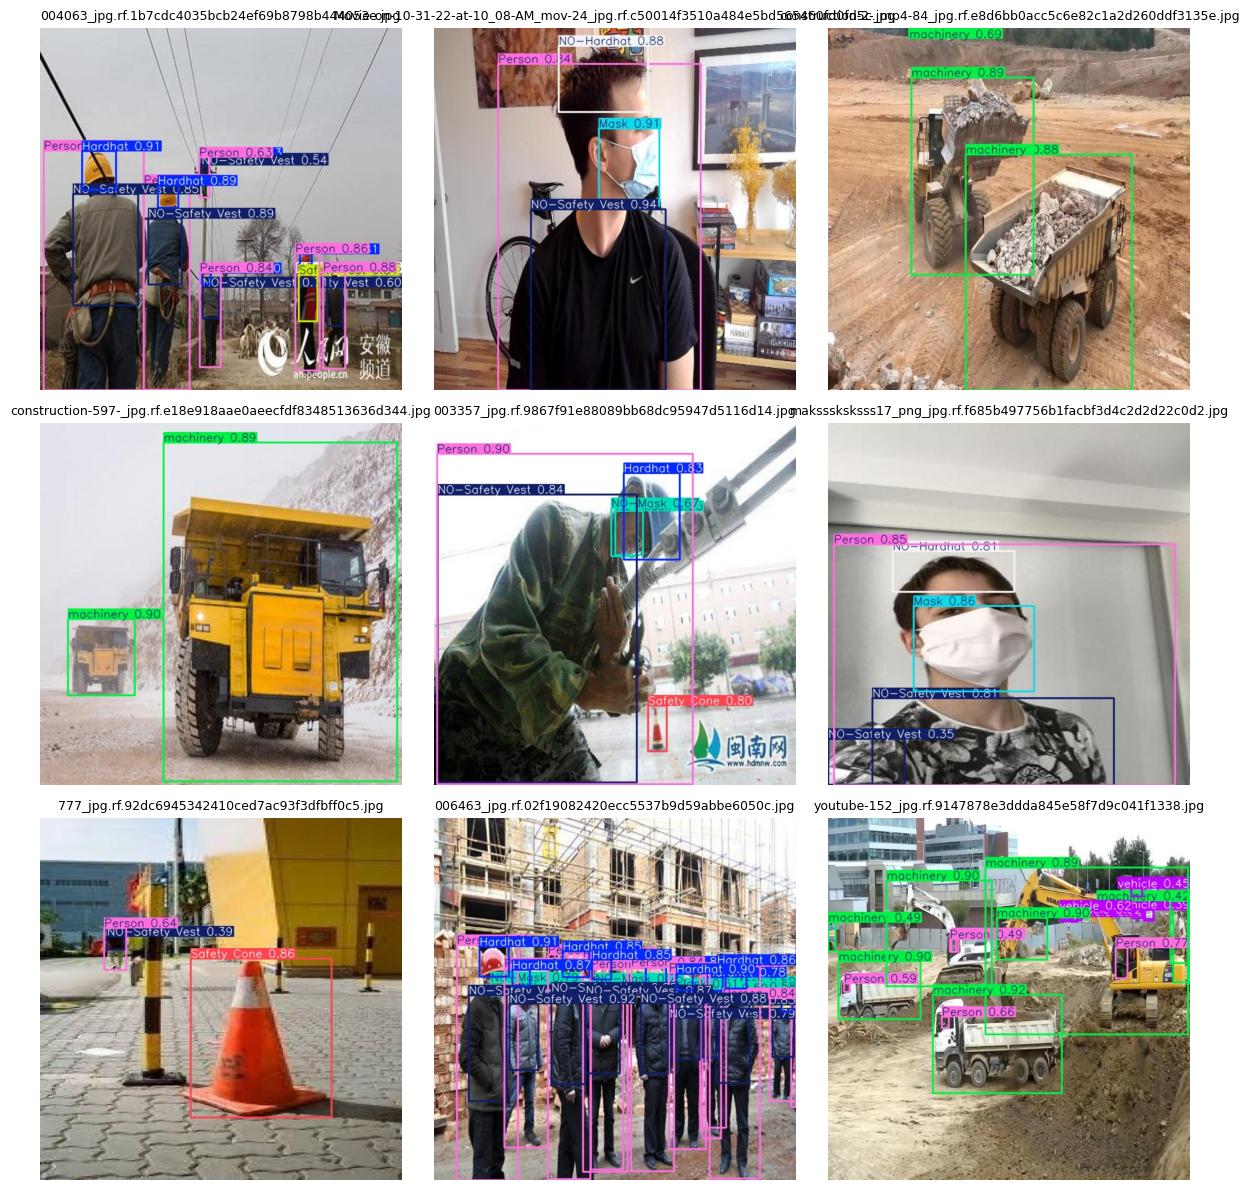

In [34]:
import glob
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Absolute path to prediction folder
image_folder = '/content/runs/detect/predict'

# Get all image files (JPG, JPEG, PNG)
image_paths = []
for ext in ('*.jpg', '*.jpeg', '*.png'):
    image_paths.extend(glob.glob(os.path.join(image_folder, ext)))

# How many images to show
n = 9

# Plot n images side-by-side
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Ensure axes is always iterable
if n == 1:
    axes = [axes]

for i in range(9):
    if i >= len(image_paths):
        break
    img = Image.open(image_paths[i])
    r, c = divmod(i, 3)
    axes[r, c].imshow(img)
    axes[r, c].set_title(os.path.basename(image_paths[i]), fontsize=9)
    axes[r, c].axis('off')

plt.tight_layout()
plt.show()



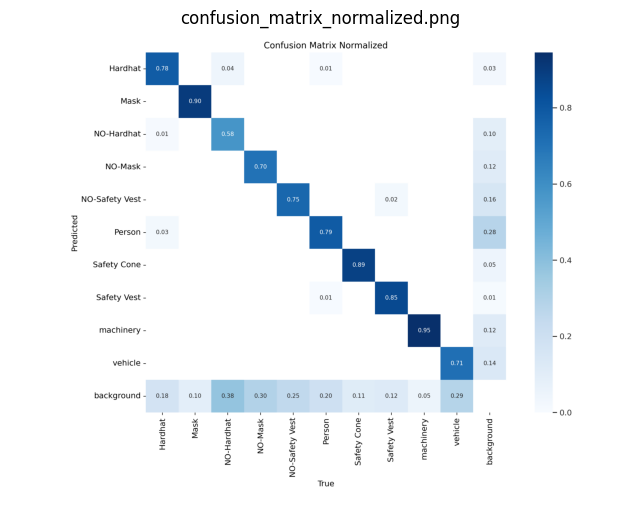

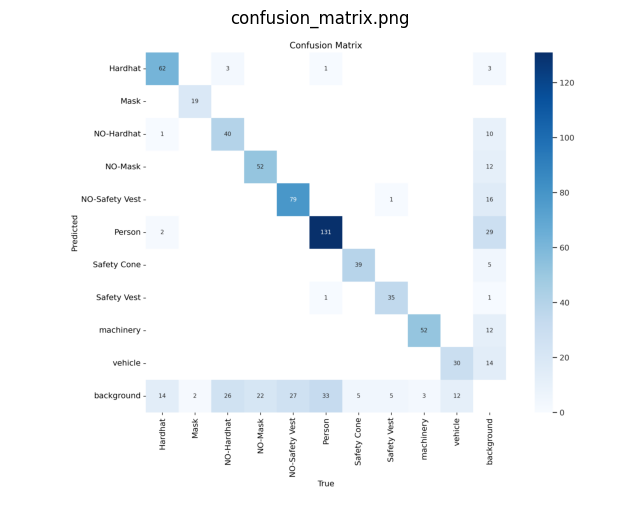

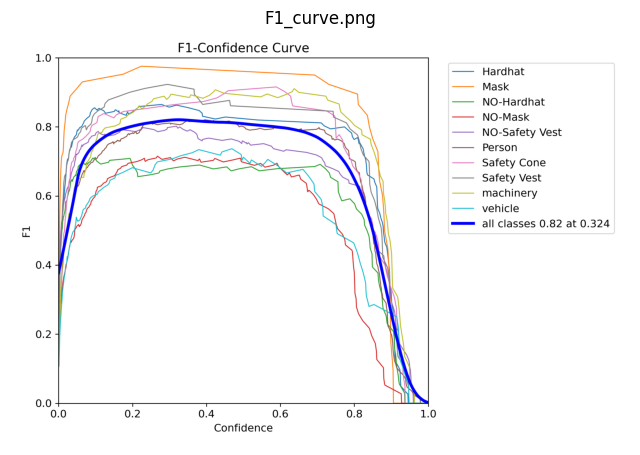

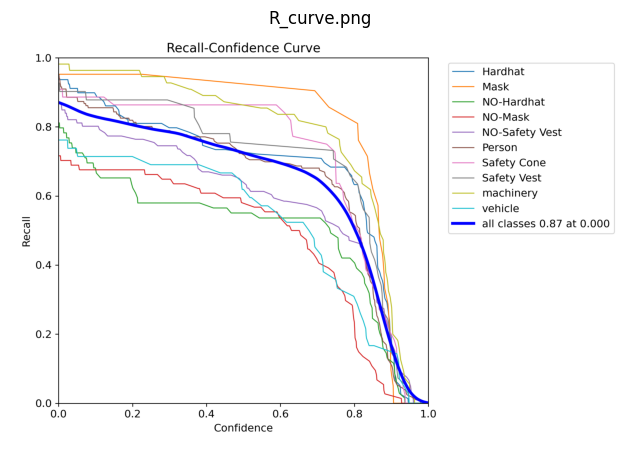

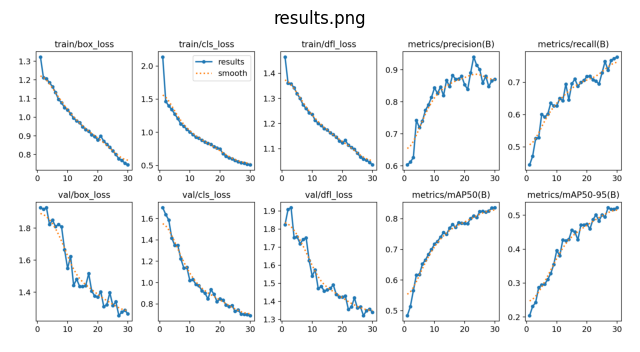

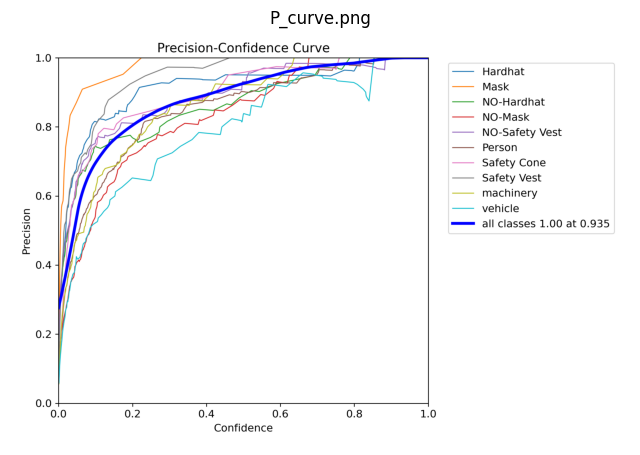

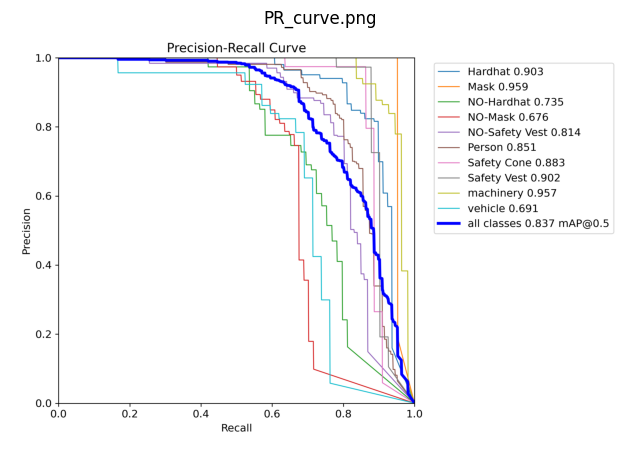

In [37]:
import math

image_folder = '/content/runs/detect/PPE-YOLO'

png_images = glob.glob(os.path.join(image_folder, '*.png'))

for image_path in png_images:
    img = Image.open(image_path)

    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(os.path.basename(image_path), fontsize=12)
    plt.axis('off')
    plt.show()